<a href="https://colab.research.google.com/github/Jadeilson08/tcc-data-science/blob/master/tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapas:

- [x] Obtenha os dados de preço histórico de Bitcoin e Ethereum em um formato de tabela (por exemplo, CSV).
- [x] Obtenha os dados do valor do dolar por dia
- [x] Utilize a biblioteca Pandas para carregar e manipular os dados.
- [x] Utilize a biblioteca Matplotlib para plotar os dados e visualizar as tendências.
- [x] Unir DF's
- [ ] Utilize a biblioteca de aprendizado de máquina scikit-learn para dividir os dados em conjuntos de treinamento e teste.
- [ ] Escolha um modelo de aprendizado de máquina apropriado para séries temporais (por exemplo, ARIMA, SARIMA, Prophet) e treine-o com os dados de treinamento.
- [ ] Faça previsões com o modelo treinado utilizando os dados de teste e avaliar a precisão do modelo.
- [ ] Utilize o modelo treinado para fazer previsões futuras.

In [1]:
# importando o data_reader
!pip install -q yfinance
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

In [2]:
# criptomoedas analisadas: Bitcoin(BTC-USD), Ethereum(ETH-USD), Tether(USDT-USD), BNB(BNB)

#data inicial e final
start_date = '2017-08-01'
end_date = '2021-08-01'

# coletando os dataframe
df_bitcoin = pdr.get_data_yahoo('BTC-USD', start=start_date, end=end_date)
df_ethereum = pdr.get_data_yahoo('ETH-USD', start=start_date, end=end_date)
df_tether = pdr.get_data_yahoo('USDT-USD', start=start_date, end=end_date)
df_bnb = pdr.get_data_yahoo('BNB', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# o index de todos os dataframe ja sao as datas, sem necessidade de atualizar o indice
df_bitcoin.info()
#df_ethereum.info()
#df_tether.info()
#df_bnb.info()
''' etapa 1 realizada '''

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2017-08-01 to 2021-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1461 non-null   float64
 1   High       1461 non-null   float64
 2   Low        1461 non-null   float64
 3   Close      1461 non-null   float64
 4   Adj Close  1461 non-null   float64
 5   Volume     1461 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 79.9 KB


' etapa 1 realizada '

In [4]:
df_bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-01,2871.300049,2921.350098,2685.610107,2718.260010,2718.260010,1324669952
2017-08-02,2727.129883,2762.530029,2668.590088,2710.669922,2710.669922,1094950016
2017-08-03,2709.560059,2813.310059,2685.139893,2804.729980,2804.729980,804796992
2017-08-04,2806.929932,2899.330078,2743.719971,2895.889893,2895.889893,1002120000
2017-08-05,2897.629883,3290.010010,2874.830078,3252.909912,3252.909912,1945699968


In [5]:
''' 
  etapa 2
  a cotacao do dolar com o valor de abertura e fechamento esta disponivel em csv
  no seguinte endereco
  https://br.investing.com/currencies/usd-brl-historical-data

'''

' \n  etapa 2\n  a cotacao do dolar com o valor de abertura e fechamento esta disponivel em csv\n  no seguinte endereco\n  https://br.investing.com/currencies/usd-brl-historical-data\n\n'

In [6]:
df_dolar = pd.read_csv('https://raw.githubusercontent.com/Jadeilson08/tcc-data-science/master/USD_BRL_20170801_20210801.csv')

#precisa mudar o index para a colula Data
df_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      1044 non-null   object
 1   Último    1044 non-null   object
 2   Abertura  1044 non-null   object
 3   Máxima    1044 non-null   object
 4   Mínima    1044 non-null   object
 5   Vol.      653 non-null    object
 6   Var%      1044 non-null   object
dtypes: object(7)
memory usage: 57.2+ KB


In [7]:
from numpy import float64

#renomeando colunas para ingles
df_dolar = df_dolar.rename(columns={'Último': 'dolar_close', 'Abertura': 'dolar_open', 'Máxima': 'dolar_high', 'Mínima': 'dolar_low', 'Vol.' : 'dolar_volume', 'Var%': 'dolar_variation'})

#convertando BR para US
columns = ['dolar_close', 'dolar_open', 'dolar_high', 'dolar_low']

for column in columns:
  df_dolar[column] = df_dolar[column].apply(lambda x: x.replace(',', '.')).astype(float64)

df_dolar['Data'] = pd.to_datetime(df_dolar['Data'], format='%d.%m.%Y')

#alterando o index para Data
df_dolar = df_dolar.set_index('Data')

df_dolar.sort_values('Data')

,dolar_close,dolar_open,dolar_high,dolar_low,dolar_volume,dolar_variation
Data,,,,,,
2017-08-01,3.1265,3.1277,3.1315,3.1079,NaN,"0,00%"
2017-08-02,3.1137,3.1261,3.1382,3.1126,NaN,"-0,41%"
2017-08-03,3.1125,3.1134,3.1270,3.1097,NaN,"-0,04%"
2017-08-04,3.1314,3.1125,3.1338,3.1079,NaN,"0,61%"
2017-08-07,3.1265,3.1311,3.1345,3.1204,NaN,"-0,16%"
...,...,...,...,...,...,...
2021-07-26,5.1761,5.2051,5.2304,5.1516,"68,85K","-0,47%"
2021-07-27,5.1690,5.1769,5.2061,5.1486,"92,09K","-0,14%"
2021-07-28,5.1157,5.1710,5.1926,5.1040,"112,11K","-1,03%"


In [9]:
'''fim etapa 2 e 3 '''

'fim etapa 2 e 3 '

In [10]:
'''
  etapa 4:

  Utilizar a biblioteca Matplotlib para plotar os dados e visualizar as tendências.
'''

'\n  etapa 4:\n\n  Utilizar a biblioteca Matplotlib para plotar os dados e visualizar as tendências.\n'

<AxesSubplot:title={'center':'Bitcoin DataSet'}, xlabel='Date'>

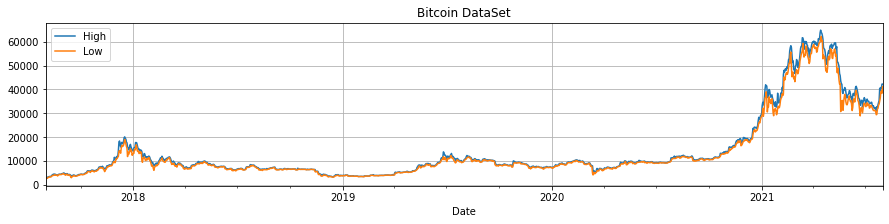

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#plotando bitcoin
df_bitcoin[['High', 'Low']].plot(figsize=(15, 3), title='Bitcoin DataSet', grid=True)

<AxesSubplot:title={'center':'Dolar DataSet'}, xlabel='Data'>

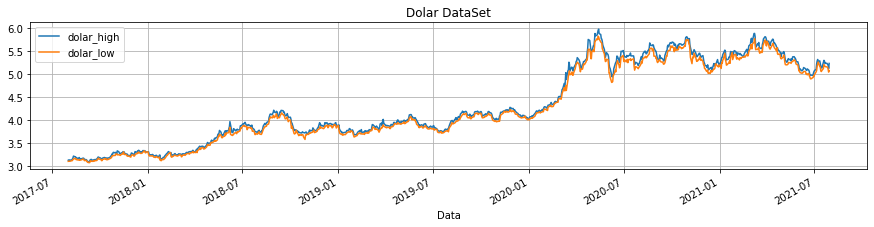

In [12]:
#plotando dolar

df_dolar[['dolar_high', 'dolar_low']].plot(figsize=(15, 3), title='Dolar DataSet', grid=True)

In [13]:
''' fim etapa 4 '''

' fim etapa 4 '

In [14]:
'''
  etapa 5
  unir DF's
'''

df_bitcoin_dolar = df_bitcoin.join(df_dolar)

,Open,High,Low,Close,Adj Close,Volume,dolar_close,dolar_open,dolar_high,dolar_low,dolar_volume,dolar_variation
Date,,,,,,,,,,,,
2017-08-01,2871.300049,2921.350098,2685.610107,2718.260010,2718.260010,1324669952,3.1265,3.1277,3.1315,3.1079,NaN,"0,00%"
2017-08-02,2727.129883,2762.530029,2668.590088,2710.669922,2710.669922,1094950016,3.1137,3.1261,3.1382,3.1126,NaN,"-0,41%"
2017-08-03,2709.560059,2813.310059,2685.139893,2804.729980,2804.729980,804796992,3.1125,3.1134,3.1270,3.1097,NaN,"-0,04%"
2017-08-04,2806.929932,2899.330078,2743.719971,2895.889893,2895.889893,1002120000,3.1314,3.1125,3.1338,3.1079,NaN,"0,61%"
2017-08-05,2897.629883,3290.010010,2874.830078,3252.909912,3252.909912,1945699968,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-04,7164.479980,7492.859863,7031.279785,7379.950195,7379.950195,2483800064,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-05,7404.520020,7617.479980,7333.189941,7407.410156,7407.410156,2380410112,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-06,7403.220215,7445.770020,7007.310059,7022.759766,7022.759766,3111899904,3.2495,3.3144,3.3144,3.2476,NaN,"-1,96%"
